<div class="jp-Cell-inputWrapper"><div class="jp-InputPrompt jp-InputArea-prompt">
</div><div class="jp-RenderedHTMLCommon jp-RenderedMarkdown jp-MarkdownOutput " data-mime-type="text/markdown">
<div style="background-color:#1d0f46;padding:14px">
<p style="text-align:center"><font size="12px" color="#d11f2f" face="Product Sans"><b>Internship - Hackathon</b></font> </p>
</div>
</div>
</div>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

# get the output for all commands

sns.set_style('whitegrid')
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlineBackend.figure_format='retina'

## Major steps invloved in EDA
1. Check for Duplicates
2. Handle missing values
3. Handle outliers
4. Descriptive Statistics
5. Data Visualization
6. Feature Scaling: Standardization & Normalization

In [2]:
intern_df = pd.read_csv(r"C:\Users\psath\Downloads\InternML\dataframe_.csv", skipinitialspace = True)

In [3]:
intern_df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [4]:
intern_df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


## Checking for Duplicates

In [5]:
intern_df.duplicated()
intern_df.duplicated().value_counts()

0       False
1       False
2       False
3       False
4       False
        ...  
1692     True
1693     True
1694     True
1695     True
1696     True
Length: 1697, dtype: bool

False    1091
True      606
dtype: int64

In [6]:
intern_df[intern_df.duplicated()]

,input,output
106,-63.366669,-33.000000
464,112.633331,103.000000
715,-31.366669,-49.000000
819,-117.366669,-75.000000
865,-131.366669,-125.000000
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [7]:
intern_df.drop_duplicates(keep = 'first', inplace = True)

In [8]:
intern_df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1107,-119.954237,123.609122
1108,-109.942155,127.197394
1109,-111.515368,128.170885
1110,-110.344221,123.087950


**We have extracted and removed the duplicates and we are going to next step**

## Identifying Null Values

In [9]:
intern_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1091 entries, 0 to 1439
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1090 non-null   float64
 1   output  1090 non-null   float64
dtypes: float64(2)
memory usage: 25.6 KB


In [10]:
intern_df.isna().sum()

input     1
output    1
dtype: int64

In [11]:
intern_df[intern_df.input.isna()]

,input,output
1439,NaN,NaN


In [12]:
intern_df[intern_df.output.isna()]

,input,output
1439,NaN,NaN


In [13]:
intern_df.input = intern_df.input.fillna(intern_df.input.median())

In [14]:
intern_df.output = intern_df.output.fillna(intern_df.output.median())

In [15]:
intern_df.reset_index()

,index,input,output
0,0,-122.740667,-130.572085
1,1,-121.531419,-129.938929
2,2,-134.917019,-130.141832
3,3,-120.605951,-125.760932
4,4,-129.894781,-112.785214
...,...,...,...
1086,1107,-119.954237,123.609122
1087,1108,-109.942155,127.197394
1088,1109,-111.515368,128.170885
1089,1110,-110.344221,123.087950


In [16]:
intern_df.isna().sum()

input     0
output    0
dtype: int64

**There are 2 null values and we replaced with median**

## Identify Corrupted Data

In [17]:
intern_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1091 entries, 0 to 1439
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1091 non-null   float64
 1   output  1091 non-null   float64
dtypes: float64(2)
memory usage: 25.6 KB


**There is no Corruputed data and we are going to next step**

## Identifying Outliers

In [18]:
intern_df.skew()

input    -0.284121
output    0.923302
dtype: float64

<Figure size 1080x360 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

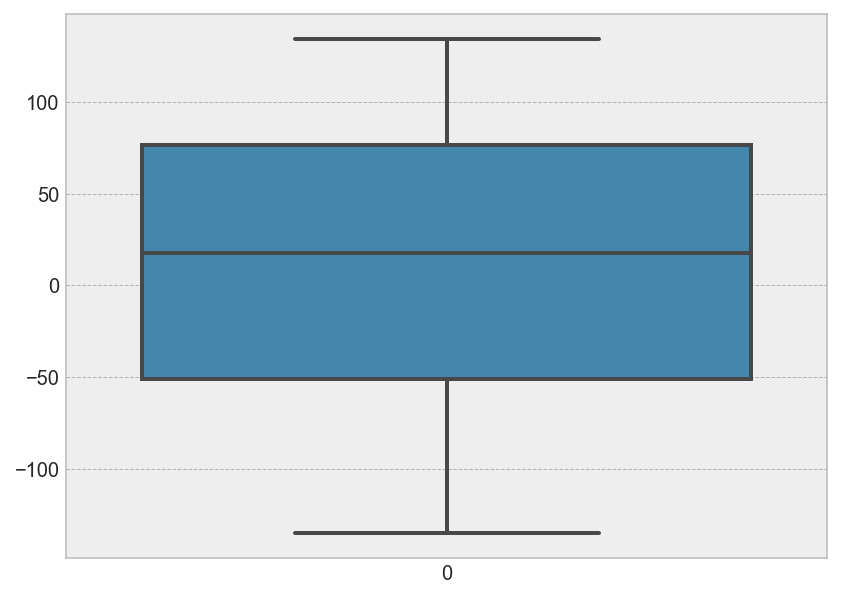

In [19]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(intern_df.input)

**There are no outliers in input column and next we are checking for output column**

<Figure size 1080x360 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

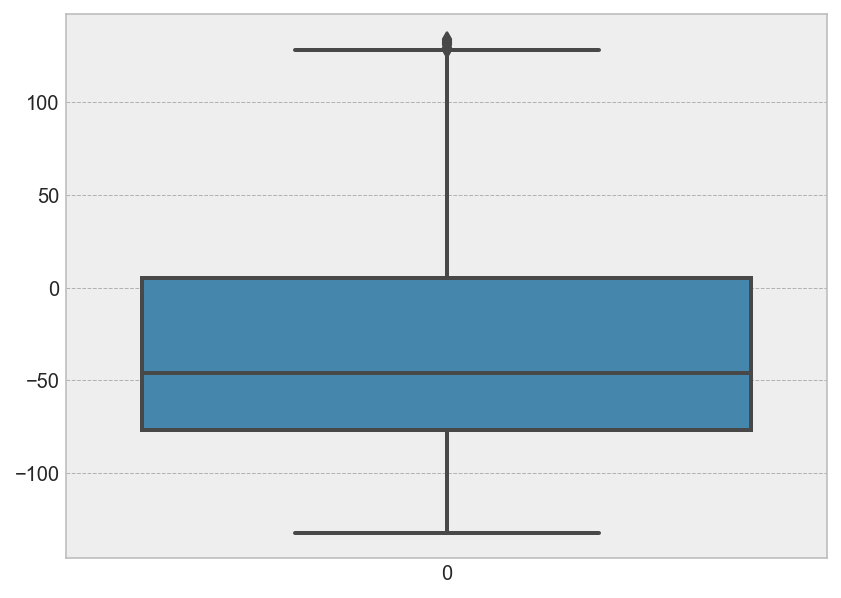

In [20]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(intern_df.output)

In [21]:
Q1, Q2, Q3 = tuple(intern_df.output.quantile(q = [0.25,0.5,0.75]).values)
print(Q1, Q2, Q3)
IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1-1.5*IQR

print(IQR, UL, LL)

intern_df[(intern_df.output  > UL) | (intern_df.output  < LL)]

-76.9885951 -46.30093846 5.0754008045
82.0639959045 128.17139466125 -200.08458895675


,input,output
355,120.589204,128.416416
359,133.101515,133.793116
360,124.633331,129.000000
362,133.024034,132.055270
473,105.705891,131.841595
475,129.541672,128.589413
477,133.358935,131.916362
480,108.413666,134.425495
1066,122.831827,129.434291
1071,99.683141,129.272153


In [22]:
droplist = intern_df[(intern_df.output  > UL) | (intern_df.output  < LL)].index.to_list()

In [23]:
intern_df.drop(droplist, axis = 0, inplace = True)

In [24]:
intern_df.reset_index(inplace = True)

In [25]:
intern_df.drop(['index'], axis=1, inplace=True)

In [26]:
intern_df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1069,-119.954237,123.609122
1070,-109.942155,127.197394
1071,-111.515368,128.170885
1072,-110.344221,123.087950


**There are some outliers in output column and we checked by using IQR Method and we have removed the outliers**

## Data Visualization

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='input', ylabel='output'>

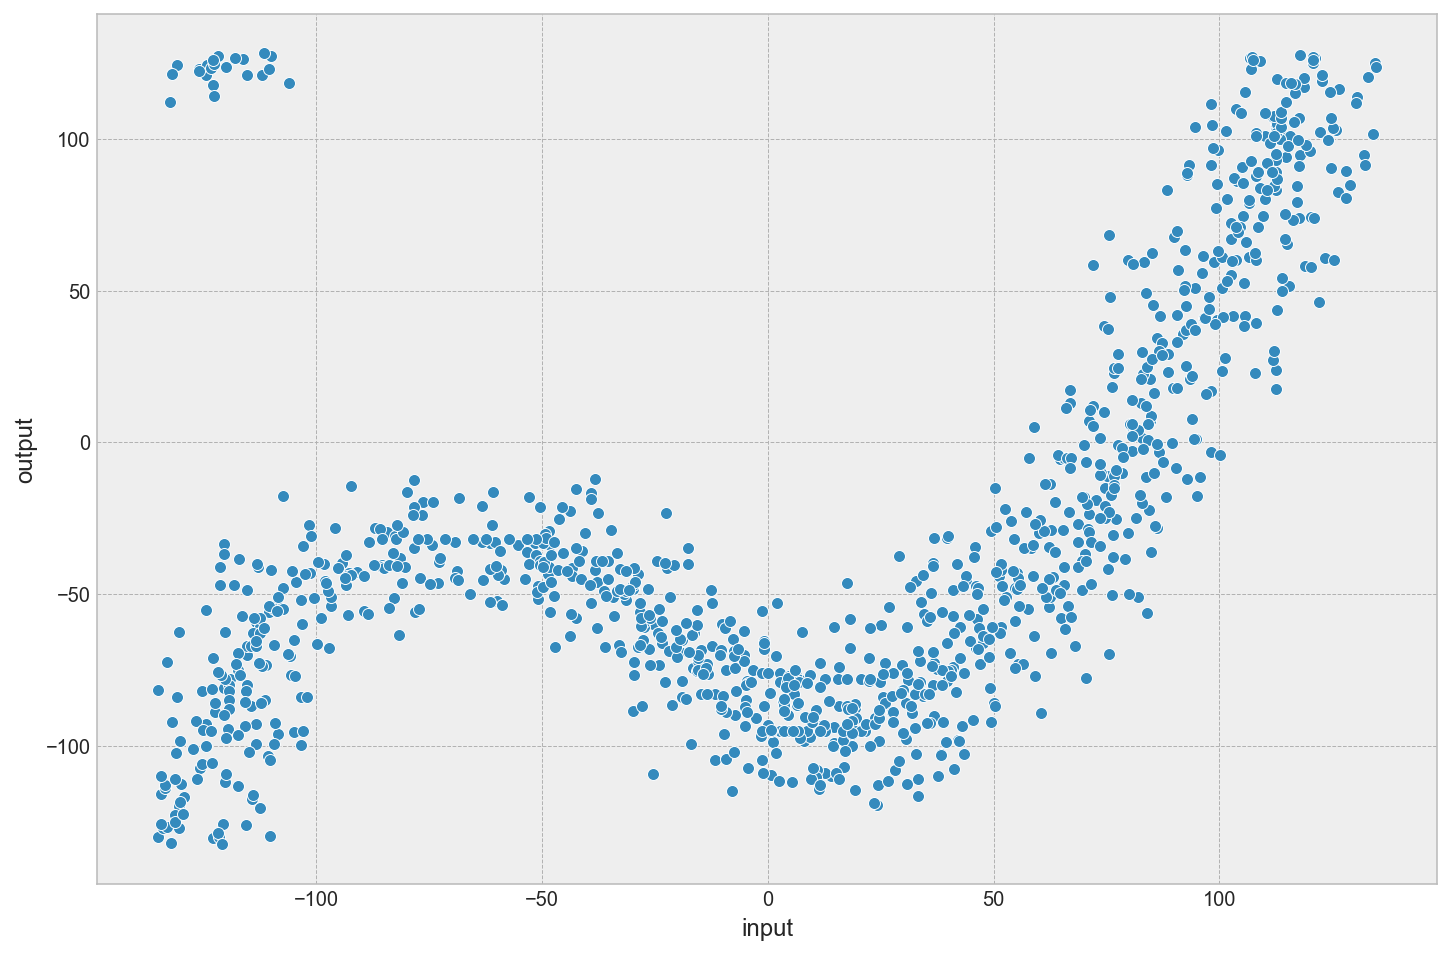

In [27]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=intern_df.input,y= intern_df.output)

## Observation:
**This graph shows the relation and visualization of input and output column**

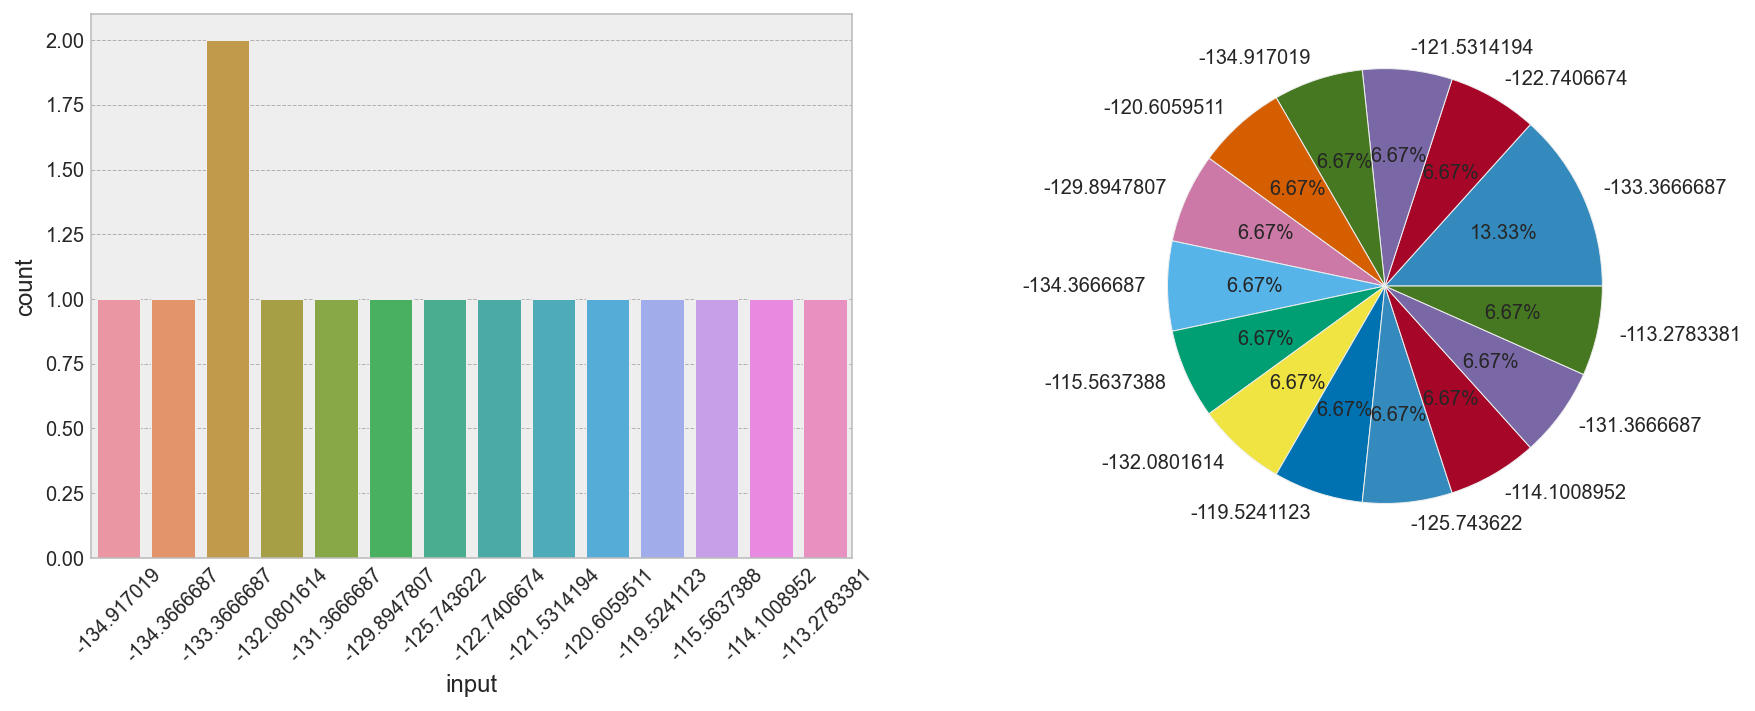

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.xticks(rotation = 45)
sns.countplot(x=intern_df.input[0:15])
plt.subplot(122)
plt.pie(intern_df.input[0:15].value_counts().values,labels=intern_df.input[0:15].value_counts().index,autopct='%.2f%%');

## Observation:
**Here in this the third value in input column is greatest among other columns**

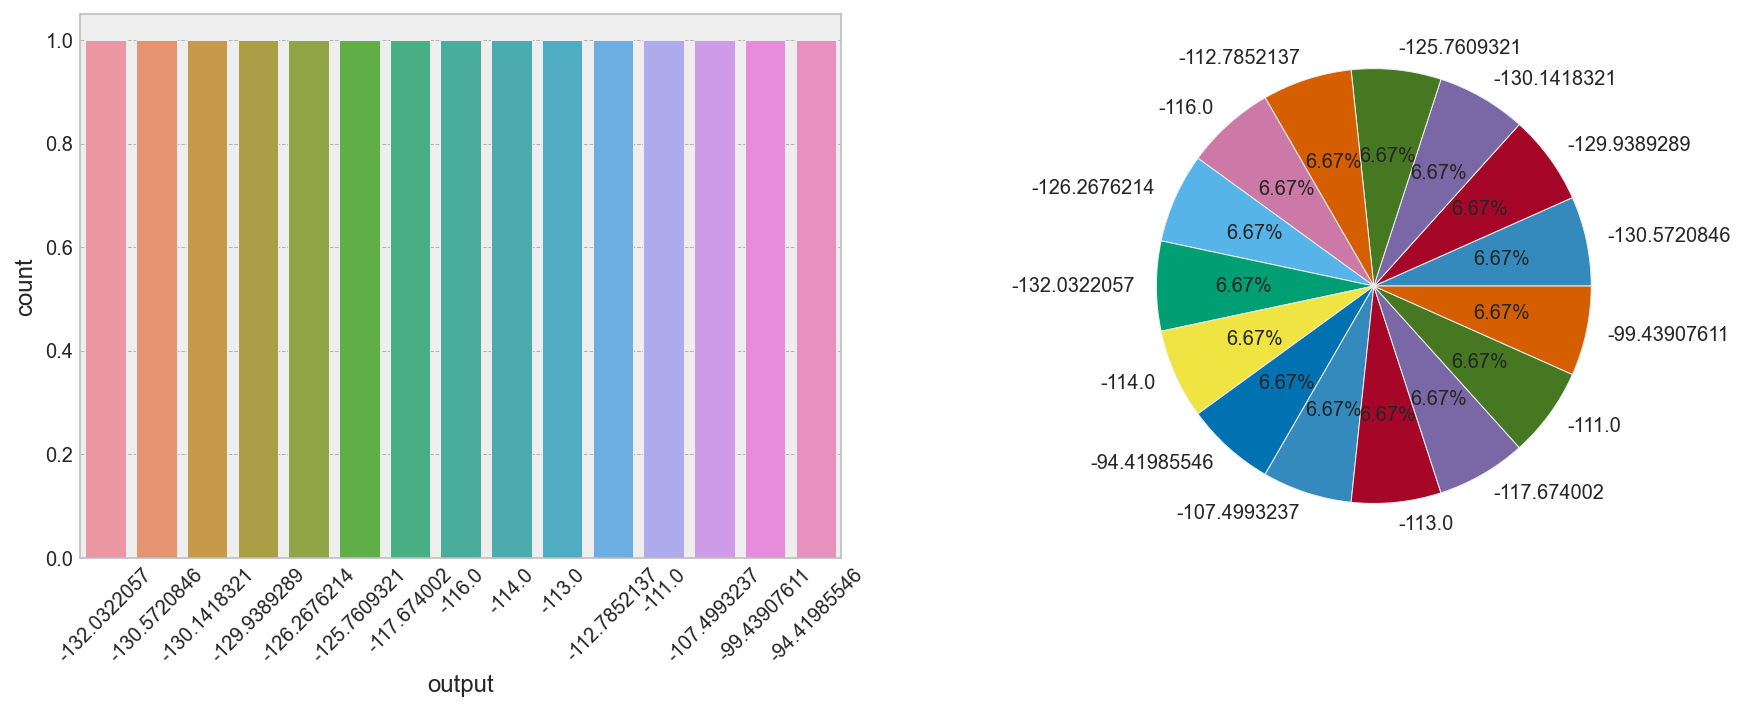

In [29]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.xticks(rotation = 45)
sns.countplot(x=intern_df.output[0:15])
plt.subplot(122)
plt.pie(intern_df.output[0:15].value_counts().values,labels=intern_df.output[0:15].value_counts().index,autopct='%.2f%%');

## Observation:
**In this column all the values are having  equal length and range**

<Figure size 864x576 with 0 Axes>

<AxesSubplot:>

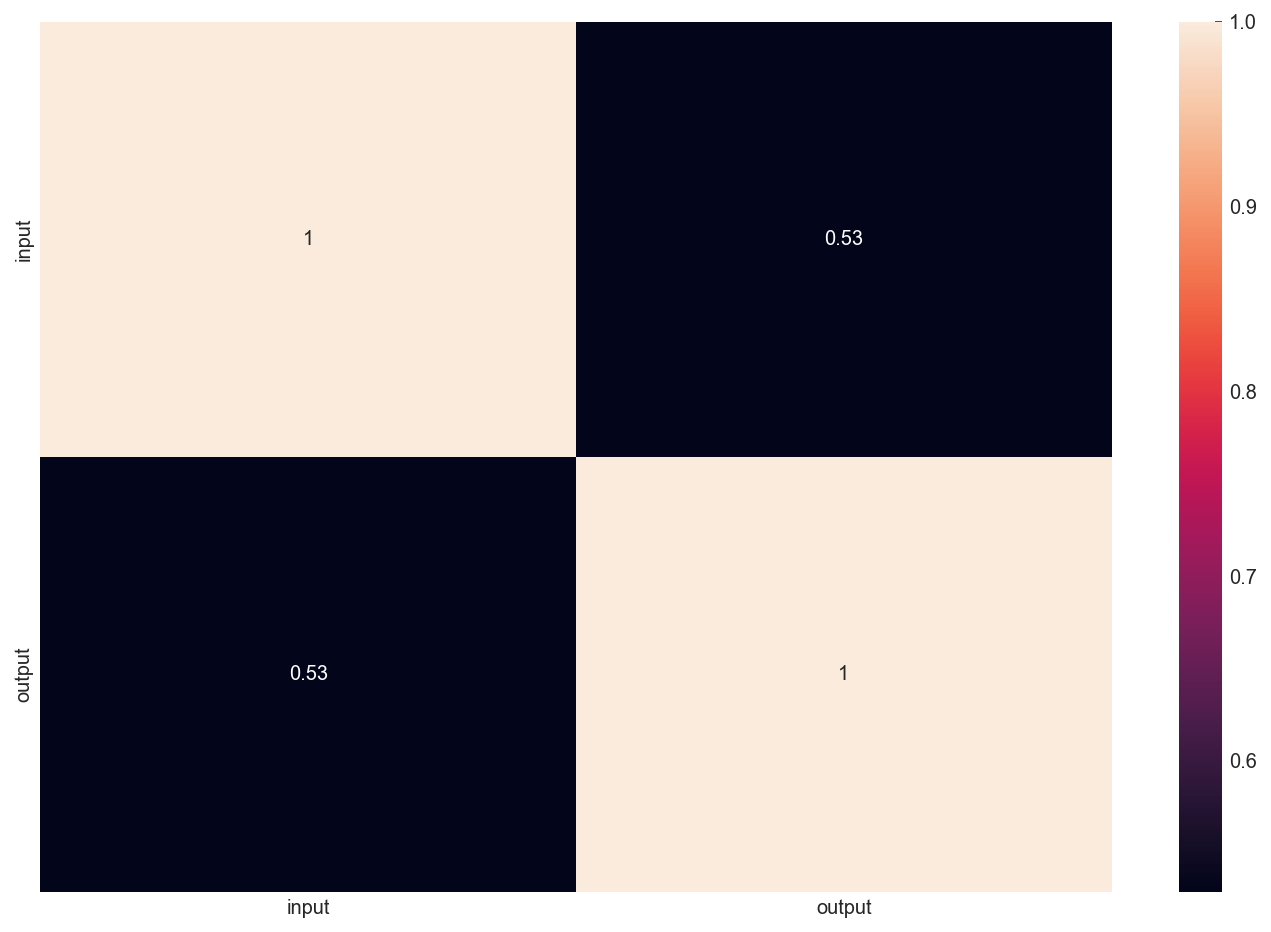

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(intern_df.corr(),annot=True)

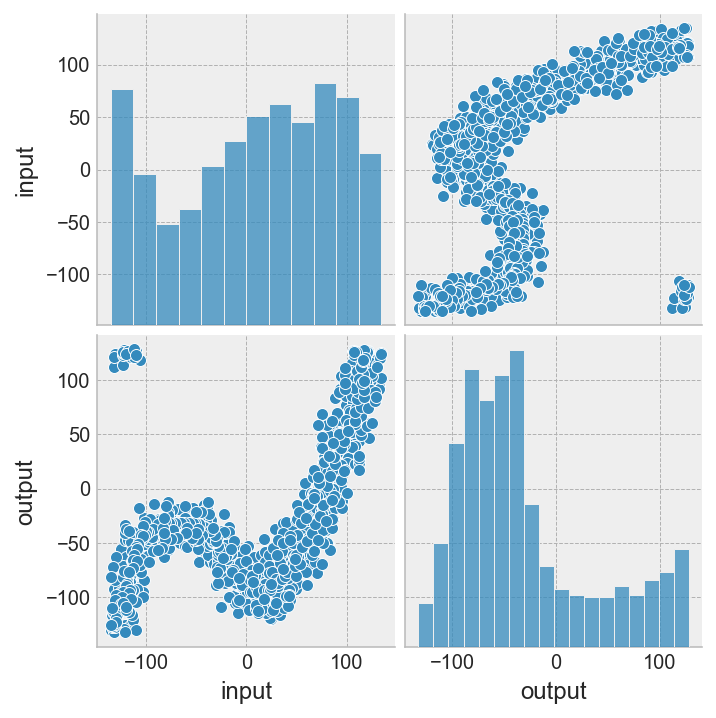

In [31]:
sns.pairplot(intern_df)

## Conclusion:
In above Pairplot graph and remaining graphs we are going to say that input column is having better visualizations than output column

In [32]:
intern_df.to_csv(r"C:\Users\psath\Downloads\InternML\intern_cleaned.csv", index = False)

In [33]:
intern_df1 = pd.read_csv(r"C:\Users\psath\Downloads\InternML\intern_cleaned.csv", skipinitialspace = True)

In [34]:
intern_df1

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1069,-119.954237,123.609122
1070,-109.942155,127.197394
1071,-111.515368,128.170885
1072,-110.344221,123.087950


## Machine Learning Problem
Build a system which can take features of dataframe like input etc.. and predicts output.\
Target Variable: output

## Identfing the Input and the Output Variables

In [35]:
y = intern_df1['output']
x = intern_df1[['input']]

In [36]:
y

0      -130.572085
1      -129.938929
2      -130.141832
3      -125.760932
4      -112.785214
           ...    
1069    123.609122
1070    127.197394
1071    128.170885
1072    123.087950
1073    -46.300938
Name: output, Length: 1074, dtype: float64

In [37]:
x

,input
0,-122.740667
1,-121.531419
2,-134.917019
3,-120.605951
4,-129.894781
...,...
1069,-119.954237
1070,-109.942155
1071,-111.515368
1072,-110.344221


## Sepearting the Data into Train and Test

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(805, 1) (805,)
(269, 1) (269,)


In [39]:
x_train

,input
425,87.325028
154,-50.893698
261,44.633331
894,18.745782
747,-61.420147
...,...
1033,98.140396
763,-101.164529
835,-112.477425
559,63.860111


In [40]:
x_test

,input
239,36.719140
642,-1.374273
722,-39.181036
484,124.727894
984,87.462564
...,...
676,-4.944896
787,-102.527342
847,-133.058490
973,48.875461


In [41]:
print(x_train.shape, y_train.shape)

print(x_test.shape, y_test.shape)

(805, 1) (805,)
(269, 1) (269,)


In [42]:
x_train.dtypes

input    float64
dtype: object

**In our data there are no Categorical columns so that we cannot do OHE or LE**

## Scaling the Numerical Features

In [43]:
x_train.head()

,input
425,87.325028
154,-50.893698
261,44.633331
894,18.745782
747,-61.420147


In [44]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

x_train_transformed = pd.DataFrame(scaler.fit_transform(x_train), 
                                    columns = x_train.columns, 
                                    index = x_train.index)

x_train_transformed.head()

,input
425,1.033434
154,-0.742028
261,0.485046
894,0.152512
747,-0.877243


In [45]:
x_train_transformed.describe()

,input
count,8.050000e+02
mean,-2.647985e-17
std,1.000622e+00
min,-1.814794e+00
25%,-7.481034e-01
50%,1.151049e-01
75%,8.783163e-01
max,1.640769e+00


In [46]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 1
Mean of each column: [6.87277768]
Std of each column: [77.84946313]


## Now for x_test Scaling 

In [47]:
x_test_transformed = pd.DataFrame(scaler.transform(x_test), 
                                   columns = x_test.columns, 
                                   index = x_test.index)

x_test_transformed.head()

,input
239,0.383386
642,-0.105936
722,-0.591575
484,1.513885
984,1.035200


**By the given dataset it is Supervised Learning 
Type is Regression because in both columns it is having Real Number means continous**

## Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train_transformed, y_train)

LinearRegression()

In [49]:
y_test_pred = regressor.predict(x_test_transformed)

In [50]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
239,-72.833758,-16.583342
642,-104.595355,-33.253934
722,-18.629766,-49.799080
484,90.472122,21.931399
984,-6.517083,5.623197


<AxesSubplot:xlabel='output', ylabel='Count'>

<AxesSubplot:xlabel='output', ylabel='Count'>

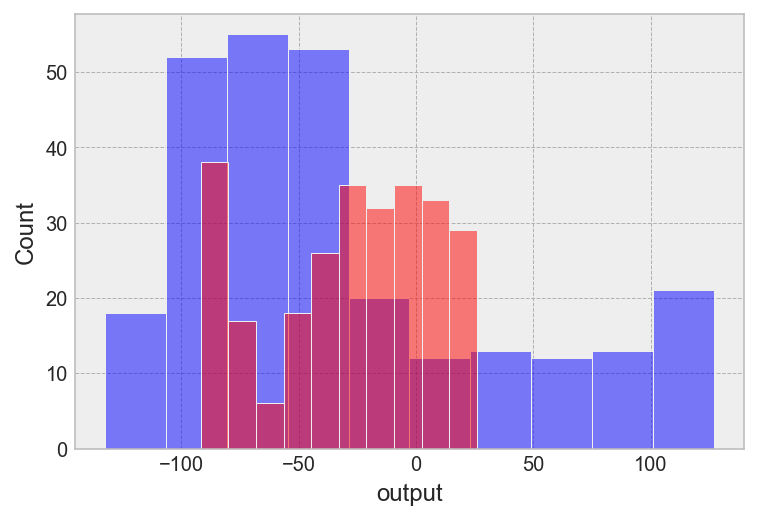

In [51]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [52]:
from sklearn import metrics
a = metrics.mean_absolute_error(y_test, y_test_pred)

print('Mean Absolute Error: ', a)

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  45.66006667406533
Mean Squared Error:  3318.0712423717628
Root Mean Squared Error:  57.60270169333868


## KNN Regressor

In [53]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(x_train_transformed, y_train)

KNeighborsRegressor()

In [54]:
y_test_pred = regressor.predict(x_test_transformed)

In [55]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
239,-72.833758,-58.199768
642,-104.595355,-76.366906
722,-18.629766,-34.205195
484,90.472122,97.174155
984,-6.517083,24.716033


<AxesSubplot:xlabel='output', ylabel='Count'>

<AxesSubplot:xlabel='output', ylabel='Count'>

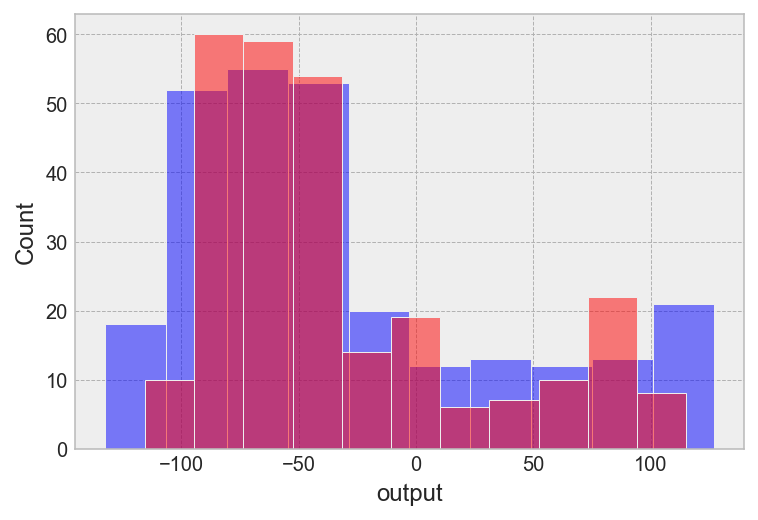

In [56]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [57]:
b = metrics.mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error: ', b)

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  24.17561895811673
Mean Squared Error:  1392.4476813512536
Root Mean Squared Error:  37.31551528990661


## Decision Tree Regression

In [58]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train_transformed, y_train)

DecisionTreeRegressor()

In [59]:
y_test_pred = regressor.predict(x_test_transformed)

In [60]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
239,-72.833758,-90.242897
642,-104.595355,-55.570297
722,-18.629766,-53.054817
484,90.472122,106.879706
984,-6.517083,28.825340


<AxesSubplot:xlabel='output', ylabel='Count'>

<AxesSubplot:xlabel='output', ylabel='Count'>

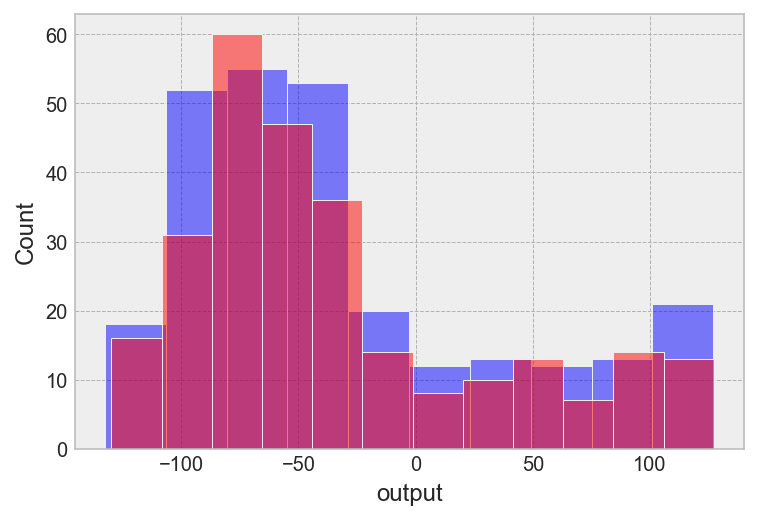

In [61]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [62]:
c = metrics.mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error: ', c)

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  24.701709600732343
Mean Squared Error:  1584.854880712598
Root Mean Squared Error:  39.81023587863551


## Random Forest Regression

In [63]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train_transformed, y_train)

RandomForestRegressor()

In [64]:
y_test_pred = regressor.predict(x_test_transformed)

In [65]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
239,-72.833758,-75.431206
642,-104.595355,-65.028812
722,-18.629766,-46.158509
484,90.472122,106.860152
984,-6.517083,26.475580


<AxesSubplot:xlabel='output', ylabel='Count'>

<AxesSubplot:xlabel='output', ylabel='Count'>

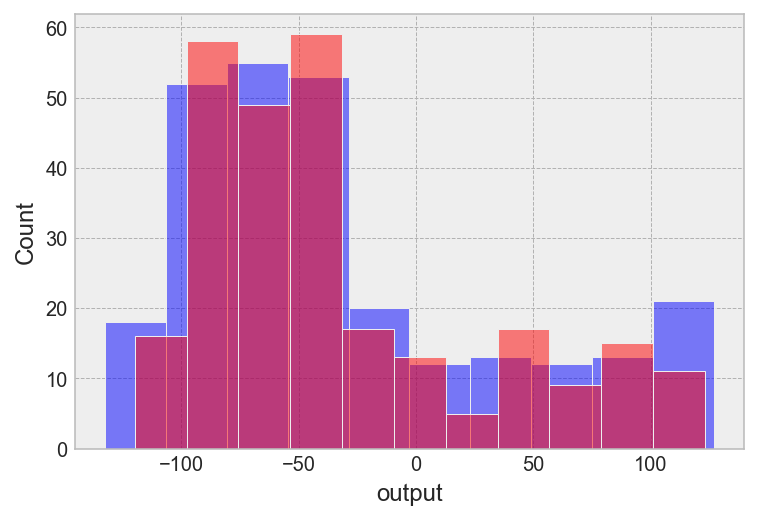

In [66]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [67]:
d = metrics.mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error: ', d)

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  23.051050666798677
Mean Squared Error:  1282.6822905012666
Root Mean Squared Error:  35.8145541714715


## Support Vector Regressor

In [68]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(x_train_transformed, y_train)

SVR()

In [69]:
y_test_pred = regressor.predict(x_test_transformed)

In [70]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
239,-72.833758,-67.515860
642,-104.595355,-76.142281
722,-18.629766,-50.451565
484,90.472122,49.753673
984,-6.517083,13.153716


<AxesSubplot:xlabel='output', ylabel='Count'>

<AxesSubplot:xlabel='output', ylabel='Count'>

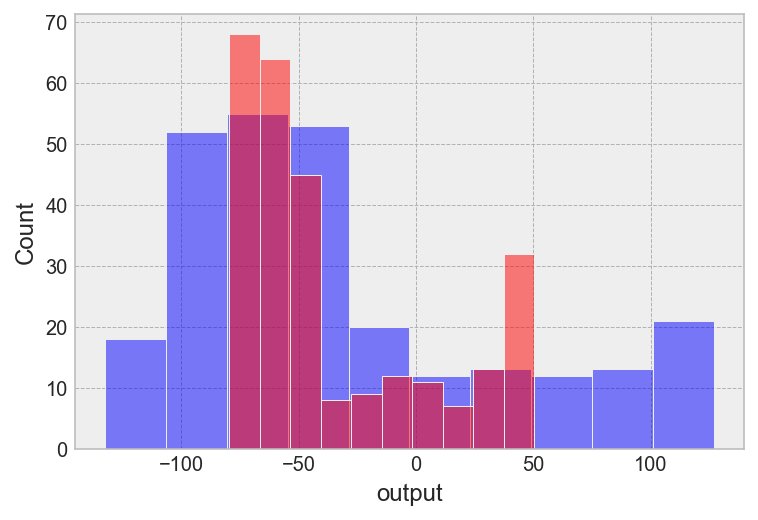

In [71]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [72]:
e = metrics.mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error: ', e)

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  26.779295231989785
Mean Squared Error:  1550.2197579927854
Root Mean Squared Error:  39.372830200441335


## Gradient Boosting Regressor

In [73]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(x_train_transformed, y_train)

GradientBoostingRegressor()

In [74]:
y_test_pred = regressor.predict(x_test_transformed)

In [75]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
239,-72.833758,-74.559159
642,-104.595355,-81.750629
722,-18.629766,-41.119445
484,90.472122,95.467610
984,-6.517083,13.626693


<AxesSubplot:xlabel='output', ylabel='Count'>

<AxesSubplot:xlabel='output', ylabel='Count'>

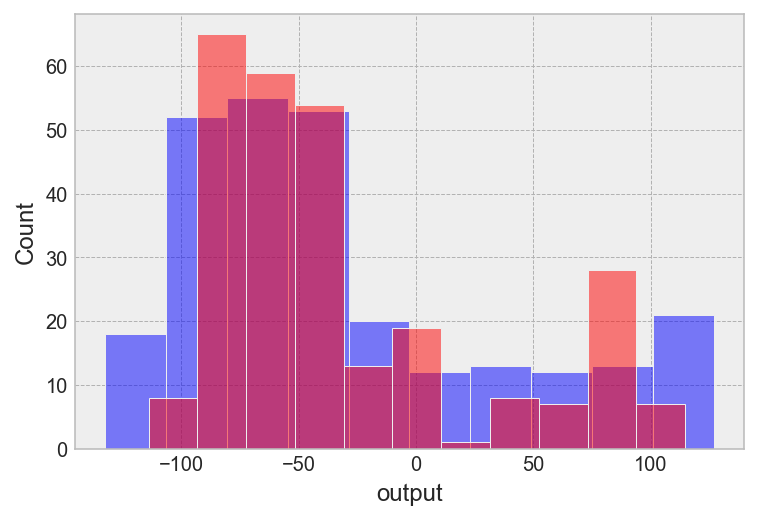

In [76]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [77]:
f = metrics.mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error: ', f)

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  20.821220466967027
Mean Squared Error:  1053.7592982052963
Root Mean Squared Error:  32.461658894845414


## ADA BOOSTING REGRESSOR

In [78]:
from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor()
regressor.fit(x_train_transformed, y_train)

AdaBoostRegressor()

In [79]:
y_test_pred = regressor.predict(x_test_transformed)

In [80]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
239,-72.833758,-64.954083
642,-104.595355,-64.954083
722,-18.629766,-59.591493
484,90.472122,89.042284
984,-6.517083,4.231416


<AxesSubplot:xlabel='output', ylabel='Count'>

<AxesSubplot:xlabel='output', ylabel='Count'>

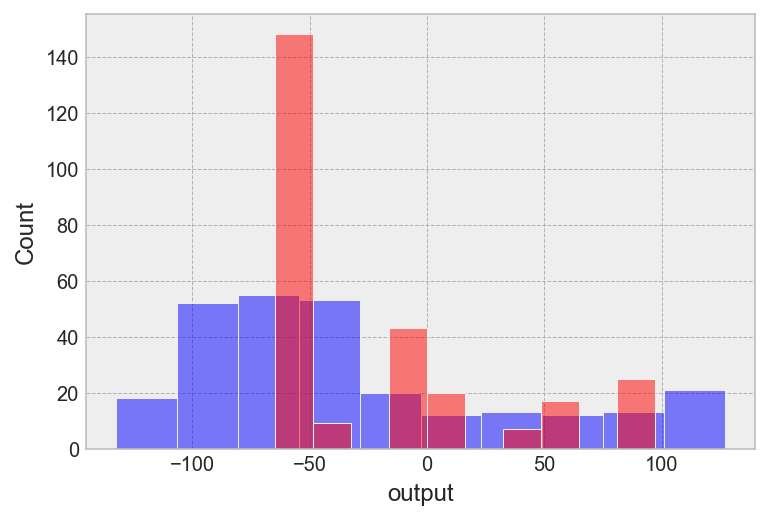

In [81]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [82]:
g = metrics.mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error: ', g)

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  29.982506364361598
Mean Squared Error:  1716.024983045293
Root Mean Squared Error:  41.424931901516665


## Bagging Regressor

In [83]:
from sklearn.ensemble import BaggingRegressor
regressor = BaggingRegressor()
regressor.fit(x_train_transformed, y_train)

BaggingRegressor()

In [84]:
y_test_pred = regressor.predict(x_test_transformed)

In [85]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
239,-72.833758,-70.352310
642,-104.595355,-64.847147
722,-18.629766,-38.519206
484,90.472122,109.115424
984,-6.517083,21.703410


<AxesSubplot:xlabel='output', ylabel='Count'>

<AxesSubplot:xlabel='output', ylabel='Count'>

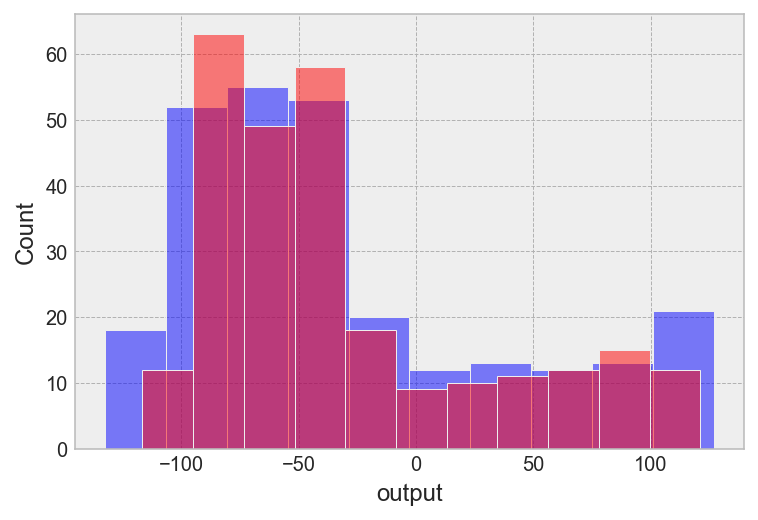

In [86]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [87]:
h = metrics.mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error: ', h)

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  23.63352635793927
Mean Squared Error:  1398.9558016860797
Root Mean Squared Error:  37.402617577999536


In [88]:
df_data1 = [['Linear Regression', a ],
            ['KNNRegressor', b],
                   ['Decision Tree Regrssor',c],
                   ['Support Vector Regressor',d],
                   ['Random Forest Regressor ',e],
                ['Gradient Boosting Decision Tree Regressor', f],
           ['Ada Boost Regressor',g],
           ['Bagging Regressor',h]]

data = pd.DataFrame(df_data1, columns = ['Algorithm','Mean_absolute'])

In [89]:
data

,Algorithm,Mean_absolute
0,Linear Regression,45.660067
1,KNNRegressor,24.175619
2,Decision Tree Regrssor,24.701710
3,Support Vector Regressor,23.051051
4,Random Forest Regressor,26.779295
5,Gradient Boosting Decision Tree Regressor,20.821220
6,Ada Boost Regressor,29.982506
7,Bagging Regressor,23.633526


<Figure size 1080x360 with 0 Axes>

<AxesSubplot:xlabel='Mean_absolute', ylabel='Algorithm'>

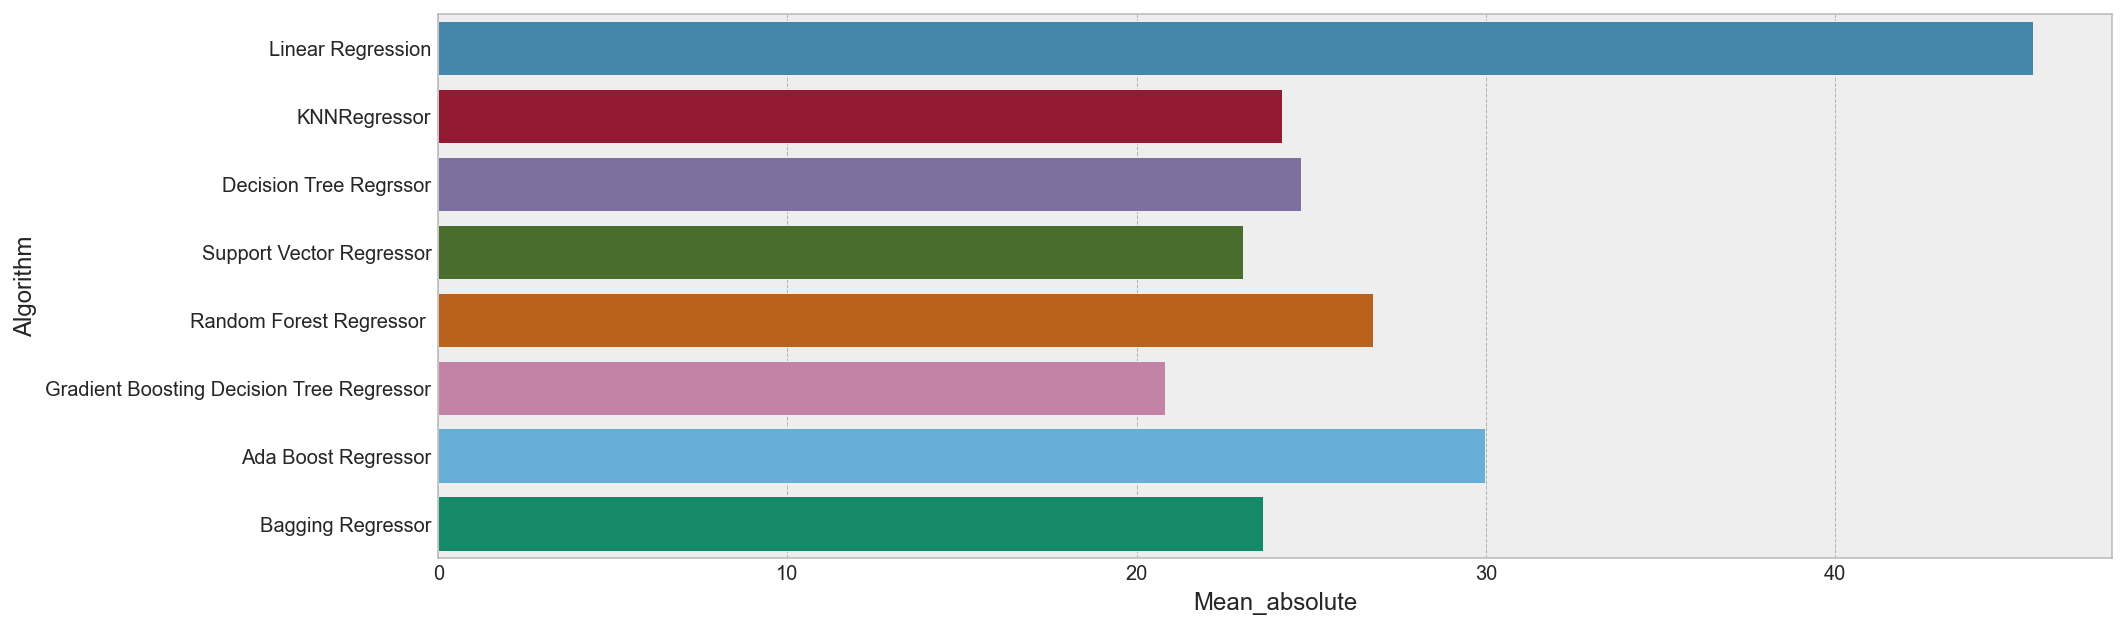

In [90]:
plt.figure(figsize=(15,5))
sns.barplot(x = data.Mean_absolute, y = data.Algorithm, ci = False)

## Conclusion:
1. From Above We Conclude that it is clear that Gradient Boost is best suited algorithm for this task.
2. Gradient Boosting Decision Tree Mean Absolute Error is having 20.821220 and it is lowest as compared to other algorithms